<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [1382]:
# PARAMETERS
csv_file = '/content/forages_parameters_2.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

parameter = 'ABS/RC' # required column
x_label = ''#grass forage species' #'$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #

y_height = 4 # height of the graph
y_dist = 1 # distance between labels
title_main = 'ABS/RC'
y_label = r'[rel.u.]' # CO$_2$'

'''
title_main = 'CO$_2$ uptake (A$_{n}$)'
y_label = r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'

title_main = 'Concentration of chlorophyll'
y_label = 'cci'

# $\mu$g m$^{-2}$ chl (cci)

title_main =  'PI $_{ABS}$ (performance index)'
y_label = '(a.u.)'

title_main =  '$\it{\u03C6}\mathsf{_{Ro}}$' \u03C8
y_label = '(a.u.)'

# TAC - water extracts
# mM AAE g${^-1}$ '[mg L${^-1}$] AAE'
'''

#
group_order = [
'`1','`4','`6','`25','`28/1','`28/15','`125/16','`125/20','`251/36','`251/3p','`251/8','`254/11','`254/17','`254/18','`425/12','`425/18','`425/25'
]

PARAMETERS - how to represent them as special characters

```'CO$_2$ uptake (A$_{n}$)'```

CO$_2$ uptake (A$_{n}$)

```r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'```

[$\mu$mol m$^{-2}$s$^{-1}$] CO$_2$

Concentration of chlorophyll

```'$\mu$g m$^{-2}$ chl (cci)'```

$\mu$g m$^{-2}$ chl (cci)

```'PI $_{ABS}$ (performance index)'```

PI $_{ABS}$ (performance index)

```'\u03C6 $_{Ro}$'```
\u03C6 \phi $_{Ro}$
(a.u.)

TAC - water extracts

```'[mM g${^-1}$] AAE'``` [mM g${^-1}$] AAE

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [1383]:
import pandas as pd
import numpy as np
# exp_0726_OJIP_p
df = pd.read_csv(csv_file, delimiter='\t', decimal=',') # delimiter '\t' or ';'

In [1384]:
#AUTO SORTING (working not very well)
'''
# Add of a column containing a numbered version of the index
df['indexNumber'] = [int(i.split('_')[-1]) for i in df.index]
# Perform sort of the rows
df.sort(['indexNumber'], ascending = [True], inplace = True)
# Deletion of the added column
df.drop('indexNumber', 1, inplace = True)
'''
#print(sorted(l, key=lambda s: int(re.search(r'file(\d+)', s).groups()[0])))

"\n# Add of a column containing a numbered version of the index\ndf['indexNumber'] = [int(i.split('_')[-1]) for i in df.index]\n# Perform sort of the rows\ndf.sort(['indexNumber'], ascending = [True], inplace = True)\n# Deletion of the added column\ndf.drop('indexNumber', 1, inplace = True)\n"

In [1385]:
#index = np.array(df.pop('index'))
#df = df.dropna()
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-1385-5ecfdc2f8e8f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Phi_Po,Psi_o,Phi_Eo,Phi_Do,Pi_Abs,ABS/RC,Phi_Ro
Phi_Po,1.000000,0.741022,0.830115,-1.000000,0.866290,-0.521783,0.252613
Psi_o,0.741022,1.000000,0.989126,-0.741022,0.862972,-0.155285,0.372525
Phi_Eo,0.830115,0.989126,1.000000,-0.830115,0.909588,-0.247879,0.370640
Phi_Do,-1.000000,-0.741022,-0.830115,1.000000,-0.866290,0.521783,-0.252613
Pi_Abs,0.866290,0.862972,0.909588,-0.866290,1.000000,-0.552749,0.490987
ABS/RC,-0.521783,-0.155285,-0.247879,0.521783,-0.552749,1.000000,-0.502438
Phi_Ro,0.252613,0.372525,0.370640,-0.252613,0.490987,-0.502438,1.000000


1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [1386]:
df = df.dropna()
try:
    df = df.sort_values(by = 'index', axis=0, ascending=True)
    sorting_labels='Index'
except:
    sorting_labels='Variant'
'''
for i in (1, 2, 4, 5):
    mask = df['index'].values == i
    df = df[~mask]
'''
# print the resulting DataFrame
print(df)
named = np.array(df.pop('groups'))
#index = np.array(df.pop('index'))
transposed_df = df.T
transposed_df

                          groups  Phi_Po  Psi_o  Phi_Eo  Phi_Do  Pi_Abs  \
0        Carthamus tinctorius L.   0.820  0.624   0.512   0.180   3.721   
1        Carthamus tinctorius L.   0.804  0.618   0.497   0.196   3.263   
2        Carthamus tinctorius L.   0.824  0.639   0.527   0.176   4.396   
3        Carthamus tinctorius L.   0.793  0.561   0.445   0.207   2.537   
4        Carthamus tinctorius L.   0.796  0.555   0.442   0.204   2.525   
5        Carthamus tinctorius L.   0.842  0.658   0.554   0.158   6.316   
6        Carthamus tinctorius L.   0.840  0.661   0.555   0.160   5.925   
7        Carthamus tinctorius L.   0.829  0.631   0.523   0.171   4.155   
8        Carthamus tinctorius L.   0.820  0.594   0.487   0.180   3.500   
9        Carthamus tinctorius L.   0.845  0.653   0.552   0.155   5.660   
10       Carthamus tinctorius L.   0.838  0.635   0.532   0.162   4.428   
11   Lablab purpureus (L.) Sweet   0.798  0.515   0.411   0.202   2.269   
12   Lablab purpureus (L.

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Phi_Po,0.82000,0.804000,0.82400,0.793000,0.796000,0.842000,0.840000,0.829000,0.820000,0.845000,...,0.792000,0.746000,0.771000,0.749000,0.814000,0.825000,0.804000,0.828000,0.828000,0.783000
Psi_o,0.62400,0.618000,0.63900,0.561000,0.555000,0.658000,0.661000,0.631000,0.594000,0.653000,...,0.488000,0.509000,0.592000,0.447000,0.552000,0.589000,0.532000,0.598000,0.597000,0.411000
Phi_Eo,0.51200,0.497000,0.52700,0.445000,0.442000,0.554000,0.555000,0.523000,0.487000,0.552000,...,0.387000,0.380000,0.456000,0.335000,0.449000,0.486000,0.428000,0.495000,0.494000,0.322000
Phi_Do,0.18000,0.196000,0.17600,0.207000,0.204000,0.158000,0.160000,0.171000,0.180000,0.155000,...,0.208000,0.254000,0.229000,0.251000,0.186000,0.175000,0.196000,0.172000,0.172000,0.217000
Pi_Abs,3.72100,3.263000,4.39600,2.537000,2.525000,6.316000,5.925000,4.155000,3.500000,5.660000,...,1.497000,1.021000,1.580000,1.248000,3.403000,4.466000,2.758000,4.750000,4.536000,1.479000
ABS/RC,2.02900,2.037000,1.89200,1.924000,1.935000,1.620000,1.723000,1.991000,1.904000,1.810000,...,2.426000,2.985000,3.084000,1.935000,1.579000,1.512000,1.689000,1.507000,1.570000,1.699000
Phi_Ro,0.25117,0.204677,0.25548,0.273692,0.281416,0.304691,0.295092,0.306674,0.248634,0.243206,...,0.142137,0.223437,0.170319,0.188153,0.236156,0.245685,0.195679,0.246503,0.240749,0.231442


1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [1387]:
#ABBREVIATION
'''
try:
    print(named)
    import re
    # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
    for i in range(len(named)):
        c = named[i][0]
        named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
    named
except:
    print(named.astype(int))
    named=named.astype(int)
    print('latin names not present')
'''

"\ntry:\n    print(named)\n    import re\n    # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'\n    for i in range(len(named)):\n        c = named[i][0]\n        named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])\n    named\nexcept:\n    print(named.astype(int))\n    named=named.astype(int)\n    print('latin names not present')\n"

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [1388]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height, y_dist, title_main):
    Fi_params = df.pop('Fi')
    Fo_params = df.pop('Fo')
    Fm_params = df.pop('Fm')
    ABS_params = df.pop('ABS/RC')
    index = np.array(df.pop('index'))

    if params == 'Phi_Ro':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ (quantum yield)'
        derived_params = (Fm_params - Fi_params)/Fm_params

    elif params == 'gamma_chl':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        #transp_p = pd.to_numeric(compound_params.T)
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 5000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 15000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = 3 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        'Index': index,
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

In [1389]:
# NORMALISING the very large values of the parameters
'''
compound_params = df.pop('Fm')
transp_p = pd.to_numeric(compound_params.T)

max_p1 = max(transp_df)
max_p2 = max(transp_p)
min_p1 = min(transp_df)
min_p2 = min(transp_p)

df_norm = (transp_df - min_p1) / (max_p1 - min_p1)
p_norm = (transp_p - min_p2) / (max_p2 - min_p2)
p_norm
'''

"\ncompound_params = df.pop('Fm')\ntransp_p = pd.to_numeric(compound_params.T)\n\nmax_p1 = max(transp_df)\nmax_p2 = max(transp_p)\nmin_p1 = min(transp_df)\nmin_p2 = min(transp_p)\n\ndf_norm = (transp_df - min_p1) / (max_p1 - min_p1)\np_norm = (transp_p - min_p2) / (max_p2 - min_p2)\np_norm\n"

1.5) Converting the dataframe into a 1D numpy array

In [1390]:
'''
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values # df - one param ; cp - comp param

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array, named)
'''

'\nfrom matplotlib.patches import namedtuple\n#convert dataframe to matrix\nconv_arr= transp_df.values # df - one param ; cp - comp param\n\n#converting into 1D array\none_D_array = conv_arr.ravel()\n\nprint(one_D_array, named)\n'

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [1391]:
try:
    data, y_height, y_dist, title_main = derivations(parameter, y_height, y_dist, title_main)
except:
    params = df.pop(parameter) #required param
    derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        'Variant': named,
        'Value': derived_params
    })

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

# writing out the combinations of the groups:
```
result.pvalues[result.pvalues < 0.05]
result.reject
result_list = result.groupsunique.tolist()

while result_list:
  for n in result_list:
    if result_list[0] != n:
      print(result_list[0], n)
  result_list.pop(0)
```

In [1392]:
data

,Variant,Value
0,Carthamus tinctorius L.,2.029
1,Carthamus tinctorius L.,2.037
2,Carthamus tinctorius L.,1.892
3,Carthamus tinctorius L.,1.924
4,Carthamus tinctorius L.,1.935
5,Carthamus tinctorius L.,1.620
6,Carthamus tinctorius L.,1.723
7,Carthamus tinctorius L.,1.991
8,Carthamus tinctorius L.,1.904
9,Carthamus tinctorius L.,1.810


In [1393]:
import statsmodels.stats.multicomp as mc

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data[sorting_labels])
result = model.tukeyhsd()

print(np.sum(result.reject), len(result.reject))
result.summary()

3 6


group1,group2,meandiff,p-adj,lower,upper,reject
Carthamus tinctorius L.,Lablab purpureus (L.) Sweet,-0.0845,0.952,-0.5274,0.3585,False
Carthamus tinctorius L.,Phalaris canariensis L.,0.489,0.0014,0.173,0.8051,True
Carthamus tinctorius L.,Trigonella foenum-graecum L.,-0.3068,0.094,-0.652,0.0384,False
Lablab purpureus (L.) Sweet,Phalaris canariensis L.,0.5735,0.0108,0.1131,1.0339,True
Lablab purpureus (L.) Sweet,Trigonella foenum-graecum L.,-0.2223,0.5868,-0.7032,0.2586,False
Phalaris canariensis L.,Trigonella foenum-graecum L.,-0.7958,0.0,-1.1631,-0.4285,True


In [1394]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)

In [1395]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data='Value'

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data], data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


0    a
1    a
2    b
3    a
dtype: object

In [1396]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10):

  for i, grp in enumerate(pd.unique(data['Variant'].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data['Variant'] == grp]['Value'].max() + y * 0.05
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i+bplt, y_pos, df_ltr.sum(axis=1)[i],
              rotation=0, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [1397]:
# Variant 1
def label_diff(i, j, text, X, Y, bplt=0, y_text=0.1, ytcoef=0.3, yarrows=0.1, left_right=True, rnd=4):
    text = np.round(text, rnd)
    lr = i if left_right else j
    props = {'connectionstyle':'bar, angle=180, fraction=0.1', 'arrowstyle':'-',\
                 'shrinkA':y_height*0.1, 'shrinkB':y_height*0.1, 'linewidth':1}
    stars = ' ***' if text < 0.001 else ' **' if text < 0.01 else ' *' if text < 0.05 else ' ns'
    ax.annotate(stars + ' (p = ' + str(text) + ')',
                    xy = (X[lr] + bplt, Y[lr] + y_text * ytcoef), zorder=10)
    ax.annotate('', xy = (X[i] + bplt, Y[i] + y_height * yarrows),
                xytext = (X[j] + bplt, Y[j] + y_height * yarrows), arrowprops=props)

In [1398]:
'''
#data.set_index('Variant').value_counts().loc[group_order].plot.bar()
import pandas as pd
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

my_df = data

sorter = dict([(k, v) for (v,k) in enumerate(group_order)])

(my_df.assign(sorter=my_df['Variant'].map(sorter))
      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
'''

"\n#data.set_index('Variant').value_counts().loc[group_order].plot.bar()\nimport pandas as pd\nfrom matplotlib.ticker import MaxNLocator\nfig, ax = plt.subplots()\n\nmy_df = data\n\nsorter = dict([(k, v) for (v,k) in enumerate(group_order)])\n\n(my_df.assign(sorter=my_df['Variant'].map(sorter))\n      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))\nax.yaxis.set_major_locator(MaxNLocator(integer=True))\n"

In [1399]:
''''''
stat_result = data.groupby([sorting_labels], as_index=False).agg({'Value':['mean','std']})

menMeans = stat_result['Value']['mean']
menStd = stat_result['Value']['std']
#grps = stat_result['Variant']

labels = pd.unique(data['Variant']).astype(str)
#print(grps)
stat_result_df = pd.DataFrame({
    #'Variant': grps,
    'mean': menMeans,
    'std': menStd
})

#labels = stat_result['Variant']
ind  = np.arange(len(stat_result_df['std']))    # the x locations for the groups
width= 0.7

In [1400]:
stat_result_df

,mean,std
0,1.899455,0.134179
1,1.815000,0.037000
2,2.388500,0.421037
3,1.592667,0.083825


In [1401]:
#ALTERNATIVE GRAPH
'''

d = data.set_index('Variant').loc[group_order]
fig,ax=plt.subplots()

d.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )


draw_letters(y_height, True, 1)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)

ax.set_xticklabels(group_order, fontsize=10
                   , style='italic', rotation=90)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
fig.suptitle('')

plt.grid(False)

'''

"\n\nd = data.set_index('Variant').loc[group_order]\nfig,ax=plt.subplots()\n\nd.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,\n             medianprops=dict(color='red'),\n             boxprops=dict(color='black'),\n             whiskerprops=dict(color='black')\n             )\n\n\ndraw_letters(y_height, True, 1)\n\nplt.ylim(ymax=y_height)\nax.set_yticks(y_ticks)\n\nax.set_xticklabels(group_order, fontsize=10\n                   , style='italic', rotation=90)\n\nax.set(title=title_main, ylabel=y_label, xlabel=x_label)\nfig.suptitle('')\n\nplt.grid(False)\n\n"

In [1402]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

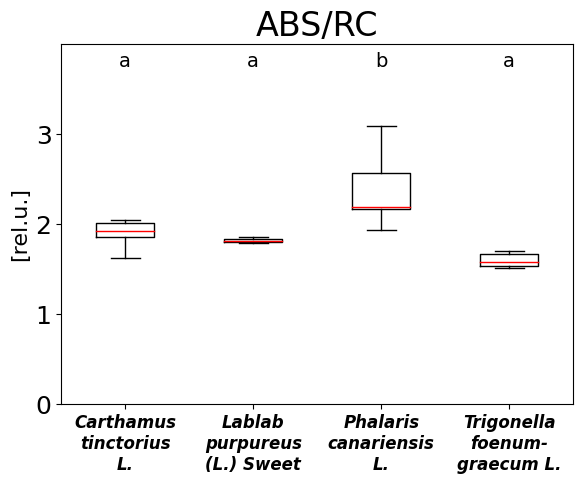

In [1403]:
#Now to plot like R with a violing plot
fig,ax=plt.subplots()

#, #patch_artist=True)

#,showmeans=True
#,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

# SORTED: by the array group_order in the set_xticklabels function below!
   #Finds the group names

#props=dict(facecolor='white',alpha=1)

#label_diff(0,2,result.pvalues[1],ind,menMeans, bplt=1, y_text=55\
#           , ytcoef=0.3, yarrows=0.20, left_right=False)
#label_diff(1,3,result.pvalues[7],ind,menMeans, bplt=1, y_text=40\
#           , ytcoef=0.3, yarrows=0.15, left_right=False)

data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )

draw_letters(y_height, False, 1, fsize=14)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_xticklabels(labels, fontsize=12, style='italic', weight='bold', rotation=0)
ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
ax.set_title(title_main, fontsize=24)
ax.set_ylabel(y_label, fontsize=16)
wrap_labels(ax, 11)
fig.suptitle('')
plt.grid(False)
fig.savefig('anovatest.jpg',dpi=300,bbox_inches='tight')

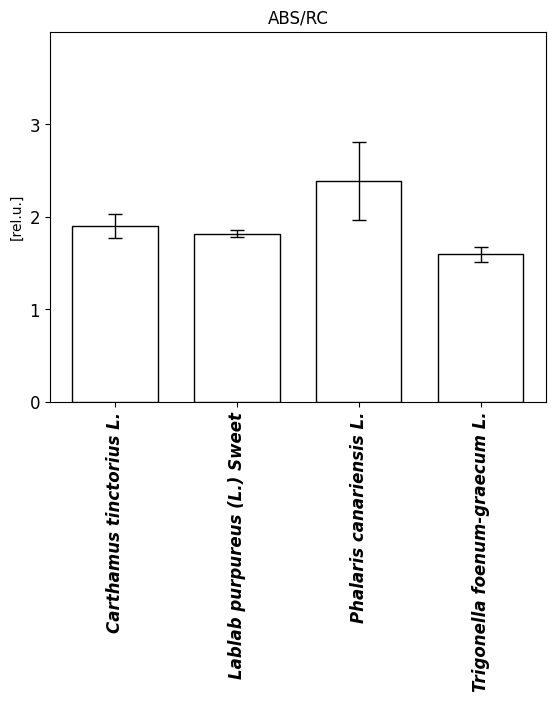

In [1404]:
# Pull the formatting out here
bar_kwargs = {'width':width,'color':'white','linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
#'zorder':0, - only up err bars
#for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()

ax.p1 = plt.bar(ind, menMeans, yerr=menStd, error_kw=err_kwargs, **bar_kwargs)
'''
plt.bar(named, data, color='r')
plt.bar(named, w-data, bottom=transposed_df['e'], color='b')
#ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)
'''
#label_diff(4,5,np.round(result.pvalues[0], 4),ind,menMeans)
'''
label_diff(0,2,np.round(result.pvalues[1], 4),ind,menMeans)
label_diff(1,3,np.round(result.pvalues[7], 4),ind,menMeans)

y_text=0.6
left_right=True
label_diff(0,1,np.round(result.pvalues[0], 4),ind,menMeans+0.6, y_text=6, left_right=left_right)
label_diff(1,2,np.round(result.pvalues[4], 4),ind,menMeans+0.9, y_text=3.7, left_right=left_right)
label_diff(2,3,np.round(result.pvalues[7], 4),ind,menMeans+0.2, y_text=3, left_right=left_right)
'''
#draw_letters(y_height)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)

plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', weight='bold', rotation=90)
#wrap_labels(ax, 16)
plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=12)

fig.suptitle('')
plt.show()

In [1405]:
# Variant 2
'''
def label_diff(i,j,y_text,X,Y):
    y = 1.15*max(Y[i], Y[j])
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':1}
    ax.annotate(' ns (p=' + str(y_text) + ')', xy=(X[i],y + y_height*0.07), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
'''

"\ndef label_diff(i,j,y_text,X,Y):\n    y = 1.15*max(Y[i], Y[j])\n    props = {'connectionstyle':'bar','arrowstyle':'-',                 'shrinkA':10,'shrinkB':10,'linewidth':1}\n    ax.annotate(' ns (p=' + str(y_text) + ')', xy=(X[i],y + y_height*0.07), zorder=10)\n    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)\n"